## Research Goal: Tracking productivity of colorado legislature!


#### Importing Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt



In [5]:
stats_df = pd.read_csv('20241101_statistics.csv',header=2)
gender_stats_df = pd.read_csv('20241101gender_status_statistics.csv',header=2)
df_leg_df = pd.read_csv("df_leg.csv")
co_leg_bills_df = pd.read_csv('co-leg-bills.csv')


stats_df= stats_df.drop(65)
stats_df.rename(columns=lambda x: x.replace('.', '_'), inplace=True)
gender_stats_df.rename(columns=lambda x: x.replace('.', '_'), inplace=True)

stats_df.head()

,County,ACN,APV,CTR,DEM,FWD,GRN,LBR,NOL,REP,...,FWD_2,GRN_2,LBR_2,NOL_2,REP_2,UAF_2,UNI_2,Prereg Total,County_3,Grand Total
0,Adams,"1,308",809,236,"91,779",22.0,627,"2,897","2,236","59,911",...,0.0,10.0,9.0,78,330,"5,414",2.0,"6,110",Adams,"360,518"
1,Alamosa,60,24,2,"2,745",0.0,20,75,52,"2,731",...,0.0,0.0,0.0,1,11,168,0.0,185,Alamosa,"11,988"
2,Arapahoe,"1,248",701,300,"125,374",29.0,853,"3,829","2,297","84,239",...,2.0,10.0,12.0,118,520,"6,603",0.0,"7,839",Arapahoe,"487,712"
3,Archuleta,43,4,3,"1,882",0.0,23,98,46,"4,009",...,0.0,0.0,0.0,2,19,144,0.0,168,Archuleta,"13,680"
4,Baca,15,1,0,276,0.0,2,17,7,"1,282",...,0.0,0.0,0.0,0,20,47,0.0,68,Baca,"2,935"


In [6]:
gender_stats_df.head()

,County,Female,Male,Not Disclosed,X,Active Total,County,Female,Male,Not Disclosed _1,...,,_1,_2,_3,_4,_5,_6,_7,_8,Unnamed: 29
0,Adams,"160,523","155,043","1,295","1,602","318,463",Adams,"17,161","18,127",26,...,,,,,,,,,,NaN
1,Alamosa,"5,258","4,917",17,52,"10,244",Alamosa,753,780,0,...,,,,,,,,,,NaN
2,Arapahoe,"216,316","204,844","1,711","1,462","424,333",Arapahoe,"26,894","28,104",18,...,,,,,,,,,,NaN
3,Archuleta,"5,816","5,795",27,12,"11,650",Archuleta,897,957,1,...,,,,,,,,,,NaN
4,Baca,"1,292","1,278",1,3,"2,574",Baca,147,146,0,...,,,,,,,,,,NaN


In [7]:
df_leg_df.head()

,,Name,Occupation,Address,Assignment,Party,Phone Number,District,Counties,Email
0,0,Judy Amabile,...,"200 E ColfaxRM 307Denver, CO 80203United States",Business Affairs & Labor; Appropriations; Legi...,Democrat,303-866-2578,['49'],"['Boulder, Gilpin, Clear Creek, Larimer'] ...",judy.amabile.house@coleg.gov
1,1,Ryan Armagost,...,"200 E ColfaxRM 307Denver, CO 80203United States",Business Affairs & Labor; Legislative Council;...,Republican,303-866-2906,['64'],"['Larimer, Weld'] ...",ryan.armagost.house@coleg.gov
2,2,Jennifer Bacon,...,"200 E ColfaxRM 307Denver, CO 80203United States",Judiciary; Education ...,Democrat,303-866-2909,['7'],['Denver'] ...,jennifer.bacon.house@coleg.gov
3,3,Mark Baisley,Aerospace Engineer ...,"200 E ColfaxRMDenver, CO 80203United States","Business, Labor, & Technology; Joint Technolog...",Republican,303-866-4877,['4'],"['Chaffee, Douglas, Jefferson, Park, Custer, F...",mark.baisley@senate.co.com
4,4,Shannon Bird,...,"200 E ColfaxRM 307Denver, CO 80203United States",Appropriations; Joint Budget Committee ...,Democrat,303-866-2843,['29'],"['Adams, Jefferson'] ...",shannon.bird.house@coleg.gov


In [8]:
co_leg_bills_df.head()

,Unnamed: 0,Bill Number,Title,Link,Description,Last Action,Governor Signed,Sponsors,Subjects,Session,Types,Last Action Date
0,0,HB16-1001,State Contract Certify Compliance With Equal P...,/bills/hb16-1001,Concerning a requirement that a business perfo...,Last Action:03/30/2016 | Senate Committee on S...,0,"Rep. J. Danielson, Rep. J. Buckner, Sen. J. Ul...",Labor & EmploymentState Government,2016 Regular Session,Type:Bill,2016-03-30
1,1,HB16-1002,Employee Leave Attend Child's Academic Activities,/bills/hb16-1002,Concerning the ability of an employee of an em...,Last Action:03/9/2016 | Senate Committee on St...,0,"Rep. J. Buckner, Sen. A. Kerr",Education & School Finance (Pre & K-12)Labor &...,2016 Regular Session,Type:Bill,2016-03-09
2,2,HB16-1003,Middle Class College Savings Act,/bills/hb16-1003,Concerning the state income tax deductions for...,Last Action:05/5/2016 | Senate Committee on St...,0,"Rep. B. Pettersen, Rep. D. Young, Sen. M. Merr...",Fiscal Policy & TaxesHigher Education,2016 Regular Session,Type:Bill,2016-05-05
3,3,HB16-1004,Measurable Goals Deadlines Colorado Climate Ac...,/bills/hb16-1004,Concerning a requirement to include measurable...,Last Action:03/30/2016 | Senate Committee on A...,0,"Rep. F. Winter, Rep. J. Arndt, Sen. J. Kefalas",EnergyNatural Resources & Environment,2016 Regular Session,Type:Bill,2016-03-30
4,4,HB16-1005,Residential Precipitation Collection,/bills/hb16-1005,Concerning the use of rain barrels to collect ...,Last Action:05/12/2016 | Governor Signed,1,"Rep. D. Esgar, Rep. J. Danielson, Sen. M. Merr...",Water,2016 Regular Session,Type:Bill,2016-05-12


In [9]:
sum(co_leg_bills_df['Governor Signed'])/len(co_leg_bills_df['Governor Signed'])

0.6084507042253521

#### Cleaning Data/ Wrangling

In [11]:
co_leg_bills_df_sponsors = co_leg_bills_df['Sponsors'].str.get_dummies(sep=', ')

co_leg_bills_df_sponsors_bills_name = pd.concat([co_leg_bills_df['Bill Number'],co_leg_bills_df_sponsors],axis=1)
co_leg_bills_df_sponsors_bills_name



,Bill Number,Rep. A. Benavidez,Rep. A. Boesenecker,Rep. A. Garnett,Rep. A. Hartsook,Rep. A. Pico,Rep. A. Valdez,Rep. A. Williams,Rep. A. Winkler,Rep. B. Bradley,...,Sen. R. Scott,Sen. R. Woodward,Sen. R. Zenzinger,Sen. S. Fenberg,Sen. S. Jaquez Lewis,Sen. T. Exum,Sen. T. Neville,Sen. T. Story,Sen. T. Sullivan,Sen. V. Marble
0,HB16-1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HB16-1002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HB16-1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HB16-1004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HB16-1005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5320,SB21-118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5321,SB21-119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5322,SB21-120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5323,SB21-121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(df_leg_df.columns)
df_leg_df.columns = df_leg_df.columns.str.strip()

sponsor_party_mapping = df_leg_df.set_index('Name')['Party'].to_dict()
co_leg_bills_df_sponsors_party = co_leg_bills_df_sponsors.rename(columns=sponsor_party_mapping)
party_contributions = co_leg_bills_df_sponsors_party.sum(axis=0).reset_index()
party_contributions.columns = ['Party', 'Contribution']


Index(['   ', 'Name                   ',
       'Occupation                                        ',
       'Address                                           ',
       'Assignment                                                                                                                                        ',
       'Party      ', 'Phone Number ', 'District      ',
       'Counties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [13]:
co_leg_bills_df['Session Year'] = co_leg_bills_df['Session'].str.extract(r'(\d{4})') # getting the year out
party_session_contributions = co_leg_bills_df_sponsors_party.copy()
party_session_contributions['Session Year'] = co_leg_bills_df['Session Year']
party_session_contributions['Session Year'] 
party_session_contributions

,Rep. A. Benavidez,Rep. A. Boesenecker,Rep. A. Garnett,Rep. A. Hartsook,Rep. A. Pico,Rep. A. Valdez,Rep. A. Williams,Rep. A. Winkler,Rep. B. Bradley,Rep. B. Buentello,...,Sen. R. Woodward,Sen. R. Zenzinger,Sen. S. Fenberg,Sen. S. Jaquez Lewis,Sen. T. Exum,Sen. T. Neville,Sen. T. Story,Sen. T. Sullivan,Sen. V. Marble,Session Year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021
5321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021
5322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021
5323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2021


In [14]:
party_session_summary = party_session_contributions.groupby('Session Year').sum().T #transpose
party_session_summary = party_session_summary.rename_axis('Name').reset_index()
party_session_summary

Session Year,Name,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Rep. A. Benavidez,0,6,18,10,17,14,11,0,0
1,Rep. A. Boesenecker,0,0,0,0,0,4,8,7,13
2,Rep. A. Garnett,13,17,10,17,19,9,6,0,0
3,Rep. A. Hartsook,0,0,0,0,0,0,0,5,6
4,Rep. A. Pico,0,0,0,0,0,11,14,0,0
...,...,...,...,...,...,...,...,...,...,...
252,Sen. T. Exum,0,0,0,0,0,0,0,14,15
253,Sen. T. Neville,17,36,41,0,0,0,0,0,0
254,Sen. T. Story,0,0,0,17,25,18,8,0,0
255,Sen. T. Sullivan,0,0,0,0,0,0,0,3,2


In [15]:
df_leg_df['Name'] = df_leg_df['Name'].str.strip()  
legislator_party_details = df_leg_df[['Name', 'Party', 'District']] 
legislator_party_details

,Name,Party,District
0,Judy Amabile,Democrat,['49']
1,Ryan Armagost,Republican,['64']
2,Jennifer Bacon,Democrat,['7']
3,Mark Baisley,Republican,['4']
4,Shannon Bird,Democrat,['29']
...,...,...,...
95,Faith Winter,Democrat,['25']
96,Ty Winter,Republican,['47']
97,Steven Woodrow,Democrat,['2']
98,Mary Young,Democrat,['50']


In [16]:
co_leg_bills_df
df_leg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0                 100 non-null    int64 
 1   Name          100 non-null    object
 2   Occupation    100 non-null    object
 3   Address       100 non-null    object
 4   Assignment    100 non-null    object
 5   Party         100 non-null    object
 6   Phone Number  100 non-null    object
 7   District      100 non-null    object
 8   Counties      100 non-null    object
 9   Email         100 non-null    object
dtypes: int64(1), object(9)
memory usage: 7.9+ KB


In [17]:
party_session_summary['last_name'] = party_session_summary.apply(
    lambda row: " ".join(row['Name'].split(" ")[-1:]).strip().lower(),
    axis=1
)
df_leg_df['last_name'] = df_leg_df.apply(
    lambda row: " ".join(row['Name'].split(" ")[-1:]).strip().lower(),
    axis=1)

merged_legislator_data = pd.merge(
    party_session_summary,
    df_leg_df,
    on='last_name',
    how='left',
    suffixes=('_party', '_coleg')  # To differentiate columns from both datasets
)

merged_legislator_data.head()

,Name_party,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,,Name_coleg,Occupation,Address,Assignment,Party,Phone Number,District,Counties,Email
0,Rep. A. Benavidez,0,6,18,10,17,14,11,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rep. A. Boesenecker,0,0,0,0,0,4,8,7,13,...,6.0,Andrew Boesenecker,...,"200 E ColfaxRM 307Denver, CO 80203United States","Legislative Audit Committee; State, Civic, Mil...",Democrat,303-866-2917,['53'],['Larimer'] ...,andrew.boesenecker.house@coleg.gov
2,Rep. A. Garnett,13,17,10,17,19,9,6,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rep. A. Hartsook,0,0,0,0,0,0,0,5,6,...,36.0,Anthony Hartsook,...,"200 E ColfaxRM 307Denver, CO 80203United States",Education; Legislative Council; Finance ...,Republican,303-866-2933,['44'],['Douglas'] ...,anthony.hartsook.house@coleg.gov
4,Rep. A. Pico,0,0,0,0,0,11,14,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualizations

In [19]:
melted_df = merged_legislator_data.melt(
    id_vars='Name_party',
    value_vars=['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
    var_name='Year',
    value_name='Productivity'
)

melted_df['Year'] = melted_df['Year'].astype(int)
aggregated_df = melted_df.groupby('Year')['Productivity'].sum().reset_index()

chart = alt.Chart(aggregated_df).mark_bar().encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Productivity:Q', title='Total Productivity'),
    tooltip=['Year:O', 'Productivity:Q']
).properties(
    title="Total Legislative Bills (co)Signed by Year",
    width=700,
    height=400
).interactive()

chart


alt.Chart(...)

In [20]:
# Differentiating by each person!

chart = alt.Chart(melted_df).mark_bar().encode(
    x=alt.X('Year:O', title='Year'),
    y=alt.Y('Productivity:Q', title='Bills (co)'),
    color=alt.Color('Name_party:N', title='Legislator',legend=None), 
    tooltip=['Name_party:N', 'Year:O', 'Productivity:Q']  
).properties(
    title="Total Legislative Bills (co)Signed by Year and each Sen. and Rep.",
    width=700,
    height=400
).interactive()

chart
# Below is a point based line chart and I thought it was bad so I switched to Altair
# print(merged_legislator_data.columns)
# years = merged_legislator_data[['2016','2017','2018','2019','2020','2021','2022','2024']]
# melted_df = merged_legislator_data.melt(
#     id_vars=["Name_party"], 
#     value_vars=years, 
#     var_name="Year", 
#     value_name="Productivity"
# )
# melted_df["Year"] = melted_df["Year"].astype(int)


# plt.figure(figsize=(10, 6))
# # for name in melted_df["Name_party"].unique():
# #     data = melted_df[melted_df["Name_party"] == name]
# plt.plot(melted_df["Year"], melted_df["Productivity"], label=name)

# plt.title("Productivity Trends Over the Years")
# plt.xlabel("Year")
# plt.ylabel("Productivity")
# plt.legend(title="Name Party", loc="upper left", bbox_to_anchor=(1, 1))
# plt.grid(True)
# plt.tight_layout()
# plt.show()

alt.Chart(...)

In [21]:
merged_legislator_data.head()

,Name_party,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,,Name_coleg,Occupation,Address,Assignment,Party,Phone Number,District,Counties,Email
0,Rep. A. Benavidez,0,6,18,10,17,14,11,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rep. A. Boesenecker,0,0,0,0,0,4,8,7,13,...,6.0,Andrew Boesenecker,...,"200 E ColfaxRM 307Denver, CO 80203United States","Legislative Audit Committee; State, Civic, Mil...",Democrat,303-866-2917,['53'],['Larimer'] ...,andrew.boesenecker.house@coleg.gov
2,Rep. A. Garnett,13,17,10,17,19,9,6,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rep. A. Hartsook,0,0,0,0,0,0,0,5,6,...,36.0,Anthony Hartsook,...,"200 E ColfaxRM 307Denver, CO 80203United States",Education; Legislative Council; Finance ...,Republican,303-866-2933,['44'],['Douglas'] ...,anthony.hartsook.house@coleg.gov
4,Rep. A. Pico,0,0,0,0,0,11,14,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Role
Representative    7976
Senator           6949
Name: Total Productivity, dtype: int64


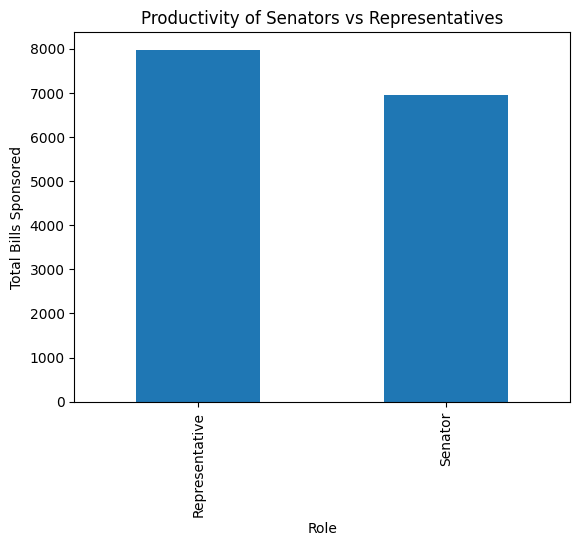

In [22]:

party_session_summary['Role'] = party_session_summary['Name'].apply(
    lambda x: 'Senator' if 'Sen.' in x else 'Representative' if 'Rep.' in x else 'Unknown'
)

session_years = [col for col in party_session_summary.columns if col.isdigit()]
party_session_summary['Total Productivity'] = party_session_summary[session_years].sum(axis=1)

role_productivity = party_session_summary.groupby('Role')['Total Productivity'].sum()

print(role_productivity)

role_productivity.plot(kind='bar', title='Productivity of Senators vs Representatives')
plt.xlabel('Role')
plt.ylabel('Total Bills Sponsored')
plt.show()


Outliers (Legislators with Unusual Sponsorship Activity):
Session Year               Name  Total Sponsored
27                Rep. D. Esgar              386
99                Rep. L. Herod              322
145                Rep. S. Bird              322
178             Sen. B. Gardner              572
189               Sen. D. Coram              440
193              Sen. D. Moreno              632
196              Sen. F. Winter              356
198             Sen. J. Bridges              384
201               Sen. J. Cooke              346
204            Sen. J. Gonzales              370
210                Sen. J. Tate              357
212             Sen. K. Donovan              344
217              Sen. K. Priola              494
243              Sen. R. Fields              504
249           Sen. R. Zenzinger              570


/var/folders/0m/dnl9zvc16c54thvr_c4qqrt40000gn/T/ipykernel_3583/2381668040.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  party_session_summary['Total Sponsored'] = party_session_summary.iloc[:, 2:].sum(axis=1)


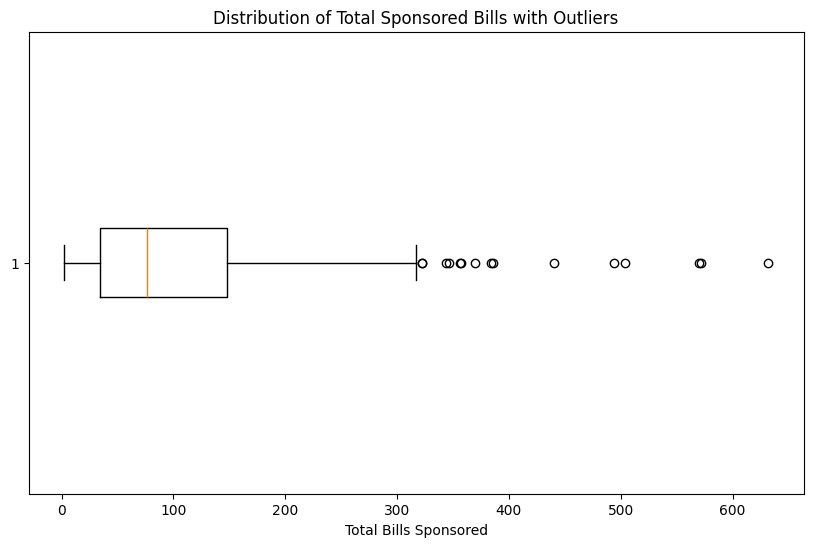

In [23]:

party_session_summary['Total Sponsored'] = party_session_summary.iloc[:, 2:].sum(axis=1)

Q1 = party_session_summary['Total Sponsored'].quantile(0.25)
Q3 = party_session_summary['Total Sponsored'].quantile(0.75)
IQR = Q3 - Q1

outliers = party_session_summary[
    (party_session_summary['Total Sponsored'] < (Q1 - 1.5 * IQR)) | 
    (party_session_summary['Total Sponsored'] > (Q3 + 1.5 * IQR))
]

print("Outliers (Legislators with Unusual Sponsorship Activity):")
print(outliers[['Name', 'Total Sponsored']])

# Visualization
plt.figure(figsize=(10, 6))
plt.title("Distribution of Total Sponsored Bills with Outliers")
plt.boxplot(party_session_summary['Total Sponsored'], vert=False)
plt.xlabel("Total Bills Sponsored")
plt.show()


In [24]:
melted_df = merged_legislator_data.melt(
    id_vars=['Name_party', 'Party'], 
    value_vars=['2016', '2017', '2018', '2019'],
    var_name='Year',
    value_name='Productivity'
)

productivity_df = melted_df.groupby(['Name_party', 'Party'])['Productivity'].sum().reset_index()

Q1 = productivity_df['Productivity'].quantile(0.25)
Q3 = productivity_df['Productivity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

productivity_df['Outlier'] = productivity_df['Productivity'].apply(
    lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Normal'
)

outliers_by_party = productivity_df[productivity_df['Outlier'] == 'Outlier'].groupby('Party')['Name_party'].count().reset_index()
outliers_by_party.rename(columns={'Name_party': 'Outlier Count'}, inplace=True)

chart = alt.Chart(outliers_by_party).mark_bar().encode(
    x=alt.X('Party:N', title='Party Affiliation'),
    y=alt.Y('Outlier Count:Q', title='Number of Outliers'),
    color='Party:N',
    tooltip=['Party:N', 'Outlier Count:Q']
).properties(
    title='Outlier Productivity by Party Affiliation',
    width=500,
    height=400
)

chart

alt.Chart(...)

In [25]:
party_session_summary.head()

Session Year,Name,2016,2017,2018,2019,2020,2021,2022,2023,2024,last_name,Role,Total Productivity,Total Sponsored
0,Rep. A. Benavidez,0,6,18,10,17,14,11,0,0,benavidez,Representative,76,152
1,Rep. A. Boesenecker,0,0,0,0,0,4,8,7,13,boesenecker,Representative,32,64
2,Rep. A. Garnett,13,17,10,17,19,9,6,0,0,garnett,Representative,91,169
3,Rep. A. Hartsook,0,0,0,0,0,0,0,5,6,hartsook,Representative,11,22
4,Rep. A. Pico,0,0,0,0,0,11,14,0,0,pico,Representative,25,50


In [26]:
party_session_summary['Outlier'] = party_session_summary['Total Productivity'].apply(
    lambda x: 'Outlier' if x > upper_bound else 'Normal'
)

outliers_list = party_session_summary[party_session_summary['Outlier'] == 'Outlier']

iqr_chart = alt.Chart(party_session_summary).mark_boxplot().encode(
    x=alt.X('Role:N', title='Role (Senator/Representative)'),
    y=alt.Y('Total Productivity:Q', title='Total Productivity'),
    color=alt.condition(
        alt.datum.Outlier == 'Outlier', 
        alt.value('red'),  
        alt.value('lightblue')  
    ),
    tooltip=['Name', 'Role', 'Total Productivity']
).properties(
    title='Distribution of Total Productivity with Outliers Highlighted',
    width=600,
    height=400
)
iqr_chart


alt.Chart(...)

In [27]:
party_session_summary

Session Year,Name,2016,2017,2018,2019,2020,2021,2022,2023,2024,last_name,Role,Total Productivity,Total Sponsored,Outlier
0,Rep. A. Benavidez,0,6,18,10,17,14,11,0,0,benavidez,Representative,76,152,Outlier
1,Rep. A. Boesenecker,0,0,0,0,0,4,8,7,13,boesenecker,Representative,32,64,Normal
2,Rep. A. Garnett,13,17,10,17,19,9,6,0,0,garnett,Representative,91,169,Outlier
3,Rep. A. Hartsook,0,0,0,0,0,0,0,5,6,hartsook,Representative,11,22,Normal
4,Rep. A. Pico,0,0,0,0,0,11,14,0,0,pico,Representative,25,50,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Sen. T. Exum,0,0,0,0,0,0,0,14,15,exum,Senator,29,58,Normal
253,Sen. T. Neville,17,36,41,0,0,0,0,0,0,neville,Senator,94,171,Outlier
254,Sen. T. Story,0,0,0,17,25,18,8,0,0,story,Senator,68,136,Outlier
255,Sen. T. Sullivan,0,0,0,0,0,0,0,3,2,sullivan,Senator,5,10,Normal


Sen. D. Moreno       319
Sen. B. Gardner      286
Sen. R. Zenzinger    285
Sen. R. Fields       253
Sen. K. Priola       247
                    ... 
Sen. T. Sullivan       5
Rep. R. Dickson        5
Rep. C. Navarro        4
Rep. R. Champion       1
Rep. A. Winkler        1
Length: 257, dtype: int64
257


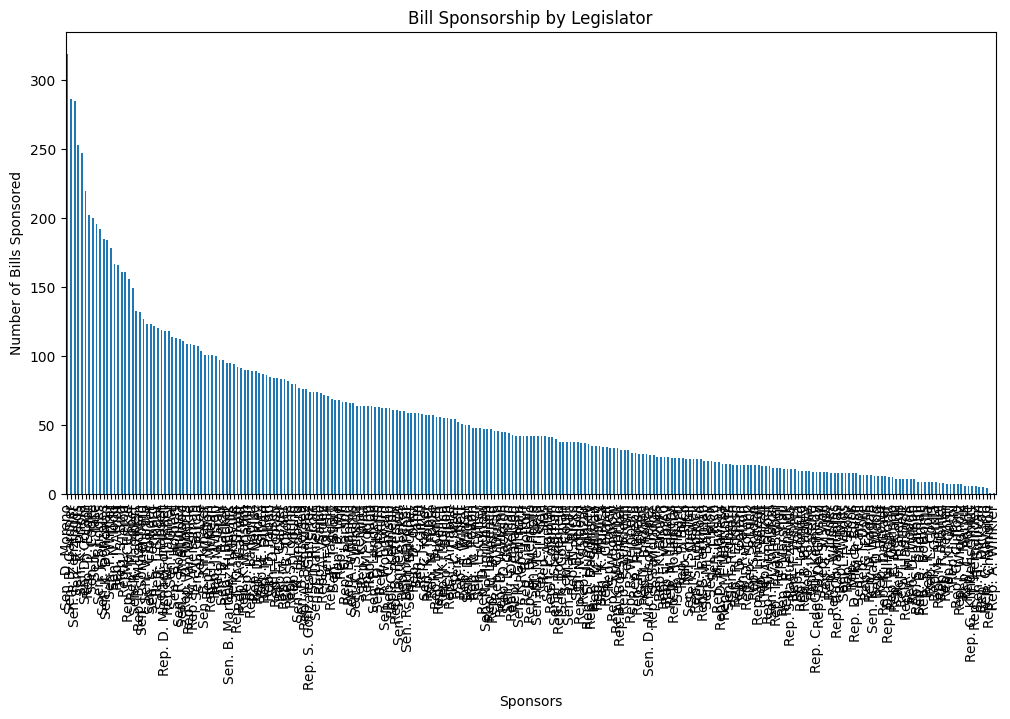

In [28]:
contribution_counts = (co_leg_bills_df_sponsors_bills_name.iloc[:, 1:] > 0).sum(axis=0)
sorted_contributions = contribution_counts.sort_values(ascending=False)
print(sorted_contributions)
print(len(sorted_contributions))
sorted_contributions.plot(kind='bar', figsize=(12, 6), title="Bill Sponsorship by Legislator")
plt.xlabel("Sponsors")
plt.ylabel("Number of Bills Sponsored")
plt.show()



In [29]:
sorted_contributions

Sen. D. Moreno       319
Sen. B. Gardner      286
Sen. R. Zenzinger    285
Sen. R. Fields       253
Sen. K. Priola       247
                    ... 
Sen. T. Sullivan       5
Rep. R. Dickson        5
Rep. C. Navarro        4
Rep. R. Champion       1
Rep. A. Winkler        1
Length: 257, dtype: int64

##### How many Bills are Resolutions?

In [31]:
co_leg_bills_df['Types'] == 'Type:Resolution'

0       False
1       False
2       False
3       False
4       False
        ...  
5320    False
5321    False
5322    False
5323    False
5324    False
Name: Types, Length: 5325, dtype: bool

In [32]:
co_leg_bills_df.head()

,Unnamed: 0,Bill Number,Title,Link,Description,Last Action,Governor Signed,Sponsors,Subjects,Session,Types,Last Action Date,Session Year
0,0,HB16-1001,State Contract Certify Compliance With Equal P...,/bills/hb16-1001,Concerning a requirement that a business perfo...,Last Action:03/30/2016 | Senate Committee on S...,0,"Rep. J. Danielson, Rep. J. Buckner, Sen. J. Ul...",Labor & EmploymentState Government,2016 Regular Session,Type:Bill,2016-03-30,2016
1,1,HB16-1002,Employee Leave Attend Child's Academic Activities,/bills/hb16-1002,Concerning the ability of an employee of an em...,Last Action:03/9/2016 | Senate Committee on St...,0,"Rep. J. Buckner, Sen. A. Kerr",Education & School Finance (Pre & K-12)Labor &...,2016 Regular Session,Type:Bill,2016-03-09,2016
2,2,HB16-1003,Middle Class College Savings Act,/bills/hb16-1003,Concerning the state income tax deductions for...,Last Action:05/5/2016 | Senate Committee on St...,0,"Rep. B. Pettersen, Rep. D. Young, Sen. M. Merr...",Fiscal Policy & TaxesHigher Education,2016 Regular Session,Type:Bill,2016-05-05,2016
3,3,HB16-1004,Measurable Goals Deadlines Colorado Climate Ac...,/bills/hb16-1004,Concerning a requirement to include measurable...,Last Action:03/30/2016 | Senate Committee on A...,0,"Rep. F. Winter, Rep. J. Arndt, Sen. J. Kefalas",EnergyNatural Resources & Environment,2016 Regular Session,Type:Bill,2016-03-30,2016
4,4,HB16-1005,Residential Precipitation Collection,/bills/hb16-1005,Concerning the use of rain barrels to collect ...,Last Action:05/12/2016 | Governor Signed,1,"Rep. D. Esgar, Rep. J. Danielson, Sen. M. Merr...",Water,2016 Regular Session,Type:Bill,2016-05-12,2016


In [33]:
resolutions_df = co_leg_bills_df.loc[co_leg_bills_df['Types'] == 'Type:Resolution']
# co_leg_bills_df_rows_resolution['Types']
resolution_counts = resolutions_df.groupby(['Sponsors', 'Session Year']).size().reset_index(name='Resolution Count')
resolution_counts.head()

,Sponsors,Session Year,Resolution Count
0,"Rep. A. Benavidez, Rep. D. Michaelson Jenet, S...",2018,1
1,"Rep. A. Benavidez, Rep. F. Winter, Sen. K. Don...",2018,1
2,Rep. A. Garnett,2019,2
3,Rep. A. Garnett,2021,1
4,"Rep. A. Garnett, Rep. A. Benavidez",2020,1


In [34]:
resolutions_df = co_leg_bills_df.loc[co_leg_bills_df['Types'] == 'Type:Resolution']
# co_leg_bills_df_rows_resolution['Types']
resolution_counts = resolutions_df.groupby(['Sponsors', 'Session Year']).size().reset_index(name='Resolution Count')
resolution_counts

Q1 = resolution_counts['Resolution Count'].quantile(0.25)
Q3 = resolution_counts['Resolution Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
resolution_counts['Outlier'] = resolution_counts['Resolution Count'].apply(
    lambda x: 'Outlier' if x > upper_bound else 'Normal'
)
boxplot = alt.Chart(resolution_counts).mark_boxplot(extent='min-max').encode(
    x=alt.X('Session Year:O', title='Session Year'),
    y=alt.Y('Resolution Count:Q', title='Number of Resolutions'),
    color=alt.Color('Outlier:N', scale=alt.Scale(domain=['Normal', 'Outlier'], range=['lightblue', 'red']),
                    legend=None)
)
outlier_points = alt.Chart(resolution_counts[resolution_counts['Outlier'] == 'Outlier']).mark_circle(size=80).encode(
    x=alt.X('Session Year:O', title='Session Year'),
    y=alt.Y('Resolution Count:Q'),
    tooltip=['Sponsors', 'Resolution Count']
)
final_chart = (boxplot + outlier_points).properties(
    title='Outlier Analysis of Sponsored Resolutions by Session Year',
    width=700,
    height=400
)
outlier_list = resolution_counts[resolution_counts['Outlier'] == 'Outlier']
print("List of Outliers in Sponsored Resolutions:")
print(outlier_list[['Sponsors', 'Session Year', 'Resolution Count']])
final_chart


List of Outliers in Sponsored Resolutions:
                                              Sponsors Session Year  \
2                                      Rep. A. Garnett         2019   
9                     Rep. A. Garnett, Sen. S. Fenberg         2019   
10                    Rep. A. Garnett, Sen. S. Fenberg         2020   
18                                    Rep. B. Marshall         2024   
26                                       Rep. C. Duran         2016   
31                     Rep. C. Duran, Sen. M. Scheffel         2016   
38                                       Rep. D. Esgar         2021   
51                      Rep. D. Esgar, Sen. S. Fenberg         2021   
106                                    Rep. J. Everett         2016   
127                                     Rep. K. Becker         2017   
129                                     Rep. K. Becker         2019   
131                    Rep. K. Becker, Rep. P. Neville         2018   
135  Rep. K. Becker, Rep. P. Nevil

alt.LayerChart(...)

In [35]:
co_leg_bills_df['Bill Origin'] = co_leg_bills_df['Bill Number'].apply(
    lambda x: 'House' if 'H' in x else ('Senate' if 'S' in x else 'Unknown')
)
bill_origin_counts = co_leg_bills_df['Bill Origin'].value_counts()
bill_origin_counts_alt = co_leg_bills_df['Bill Origin'].value_counts().reset_index()
bill_origin_counts_alt.columns = ['Bill Origin', 'Count']

chart = alt.Chart(bill_origin_counts_alt).mark_bar(cornerRadiusTopLeft=5, cornerRadiusTopRight=5).encode(
    x=alt.X('Bill Origin:N', title='Bill Origin'),
    y=alt.Y('Count:Q', title='Number of Bills'),
    color=alt.Color('Bill Origin:N', scale=alt.Scale(scheme='set2'), title='Bill Origin'),
    tooltip=['Bill Origin', 'Count']
).properties(
    title="Number of Bills by Origin (House vs Senate)",
    width=500,
    height=400
)
chart

alt.Chart(...)

In [36]:
stacked_data = co_leg_bills_df.groupby(['Bill Origin', 'Governor Signed']).size().unstack()
stacked_data

Governor Signed,0,1
Bill Origin,,
House,1550,2349
Senate,535,891


In [37]:
stacked_data_alt = co_leg_bills_df.groupby(['Bill Origin', 'Governor Signed']).size().reset_index()
stacked_data_alt.columns = ['Bill Origin', 'Governor Signed', 'Count']

alt_chart = alt.Chart(stacked_data_alt).mark_bar().encode(
    x=alt.X('Bill Origin:N', title='Bill Origin'),
    y=alt.Y('sum(Count):Q', title='Number of Bills'),
    color=alt.Color('Governor Signed:N', title='Governor Signed', 
                    scale=alt.Scale(domain=[0, 1], range=['lightcoral', 'lightgreen'])),
    tooltip=['Bill Origin', 'Governor Signed', 'Count']
).properties(
    title="Who gets the bill signed more often? House or Senate?",
    width=600,
    height=400
)
alt_chart

alt.Chart(...)

###### Chi^2 Test to determine if there a relationship between the origin of bills (House/Senate) and whether they were signed by the governor?
###### Hypothesis: There is no significant difference in the proportions of bills signed between the House and Senate.



In [39]:
stacked_data

Governor Signed,0,1
Bill Origin,,
House,1550,2349
Senate,535,891


In [40]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(stacked_data)
# Calculate the ratios
house_signed = stacked_data.loc['House', 1]
house_total = stacked_data.loc['House', 0] + house_signed
house_ratio = house_signed / house_total

senate_signed = stacked_data.loc['Senate', 1]
senate_total = stacked_data.loc['Senate', 0] + senate_signed
senate_ratio = senate_signed / senate_total

print(f"House Productivity Ratio: {house_ratio:.4f}")
print(f"Senate Productivity Ratio: {senate_ratio:.4f}")
print(f"Chi-squared: {chi2:.4f}, p-value: {p:.4f}")


House Productivity Ratio: 0.6025
Senate Productivity Ratio: 0.6248
Chi-squared: 2.0988, p-value: 0.1474


The Senate has a slightly higher proportion than the house, the p-value is 0.1474 therefore there is no statistically significant difference(failing to reject null hypothesis)

In [42]:
stacked_data_alt

,Bill Origin,Governor Signed,Count
0,House,0,1550
1,House,1,2349
2,Senate,0,535
3,Senate,1,891
